# Flight Delay Prediction - EDA

**Goal:** Predict arrival delays using pre-flight information.

**Dataset:** US Domestic Flights (2015) - 5.8M flights

**Plan:**
1. Load and understand data
2. Clean dataset (remove cancelled/diverted flights)
3. Handle outliers
4. Create features
5. Check correlations

In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [333]:
df_flights = pd.read_csv("../data/raw/flights.csv", low_memory=False)

## First Look at the Data

Checking:
- Dataset size
- Column types
- Missing values
- Target variable distribution

In [334]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
df_flights.shape

(5819079, 31)

In [336]:
df_flights.info()

<class 'pandas.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              str    
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          str    
 7   ORIGIN_AIRPORT       str    
 8   DESTINATION_AIRPORT  str    
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24  CANCELLED

In [337]:
df_flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [338]:
df_flights.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

## Data Cleaning - Remove Invalid Flights

**Why?**
- Cancelled flights: No arrival delay (didn't fly)
- Diverted flights: Missing arrival delay (didn't reach destination)

Both would add noise to predictions.

In [339]:
print(f"Total rows original: {len(df_flights)}")
print(f"Cancelled flights: {df_flights['CANCELLED'].sum()}")
print(f"NaN in ARRIVAL_DELAY: {df_flights['ARRIVAL_DELAY'].isna().sum()}")

cancelled_flights = df_flights[df_flights['CANCELLED'] == 1]
print(f"Cancelled flights with NaN delay: {cancelled_flights['ARRIVAL_DELAY'].isna().sum()}")


Total rows original: 5819079
Cancelled flights: 89884
NaN in ARRIVAL_DELAY: 105071
Cancelled flights with NaN delay: 89884


In [340]:
# Deleting all of the cancelled flights
df_flights = df_flights[df_flights['CANCELLED'] == 0]

In [341]:
print(f"Total rows after cleaning: {len(df_flights)}")
print(f"Arrival delay NaN remaining: {df_flights['ARRIVAL_DELAY'].isna().sum()}")

Total rows after cleaning: 5729195
Arrival delay NaN remaining: 15187


In [342]:
print(f"Number of diverted flights: {len(df_flights[df_flights['DIVERTED'] == 1])}")

Number of diverted flights: 15187


In [343]:
df_flights = df_flights[df_flights['DIVERTED'] == 0]

In [344]:
print(f"Total rows after cleaning: {len(df_flights)}")
print(f"Arrival delay NaN remaining: {df_flights['ARRIVAL_DELAY'].isna().sum()}")

Total rows after cleaning: 5714008
Arrival delay NaN remaining: 0


## Data Leakage Prevention

**Removing columns that aren't available before flight:**

Post-flight info:
- DEPARTURE_TIME, TAXI_OUT, AIR_TIME, etc. (only known AFTER takeoff)
- Delay breakdowns (AIR_SYSTEM_DELAY, WEATHER_DELAY, etc.)

Identifiers:
- FLIGHT_NUMBER, TAIL_NUMBER (not predictive)

**Goal:** Keep only features available at booking time.

In [345]:
def clean_dataset_for_modeling(df):
    """
    Remove columns that cannot be used for pre-flight delay prediction.
    
    This function keeps only features that are available BEFORE the flight,
    preventing data leakage and ensuring the model can be used in production.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Raw flight dataset (after removing cancelled/diverted flights)
    
    Returns:
    --------
    df_clean : pd.DataFrame
        Clean dataset with only pre-flight features
    """
    
    # Columns to drop with detailed reasoning
    columns_to_drop = [
        # ===== IDENTIFIERS (Not Predictive Features) =====
        'YEAR',
        'FLIGHT_NUMBER',
        'TAIL_NUMBER',
        
        # ===== POST-FLIGHT INFORMATION (Data Leakage) =====
        # These are only known AFTER the flight happens
        'DEPARTURE_TIME',
        'DEPARTURE_DELAY',
        'TAXI_OUT',
        'WHEELS_OFF',
        'ELAPSED_TIME',
        'AIR_TIME',
        'WHEELS_ON',
        'TAXI_IN',
        'ARRIVAL_TIME',
        
        # ===== DELAY BREAKDOWN (Post-Flight + Data Leakage) =====
        # These explain WHY flight was delayed, but are only known after landing
        'AIR_SYSTEM_DELAY',
        'SECURITY_DELAY',
        'AIRLINE_DELAY',
        'LATE_AIRCRAFT_DELAY',
        'WEATHER_DELAY',
        
        # ===== ALREADY FILTERED (100% NaN or not relevant) =====
        'CANCELLED',
        'DIVERTED',
        'CANCELLATION_REASON',
    ]
    
    # Drop columns (only if they exist in dataframe)
    columns_existing = [col for col in columns_to_drop if col in df.columns]
    df_clean = df.drop(columns=columns_existing)
    
    return df_clean

In [346]:
df_flights = clean_dataset_for_modeling(df_flights)
df_flights.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,1,4,AS,ANC,SEA,5,205.0,1448,430,-22.0
1,1,1,4,AA,LAX,PBI,10,280.0,2330,750,-9.0
2,1,1,4,US,SFO,CLT,20,286.0,2296,806,5.0
3,1,1,4,AA,LAX,MIA,20,285.0,2342,805,-9.0
4,1,1,4,AS,SEA,ANC,25,235.0,1448,320,-21.0


## Understanding ARRIVAL_DELAY

Looking at:
- Distribution (skewness)
- Outliers (extreme delays)
- Summary statistics

**Finding:** Heavy right-skew with some extreme outliers (>400 min)

In [347]:
arrival_delayed = df_flights[df_flights['ARRIVAL_DELAY'] > 0]
arrived_early = df_flights[df_flights['ARRIVAL_DELAY'] < 0]
on_time = df_flights[df_flights['ARRIVAL_DELAY'] == 0]
delayed_400min = df_flights[df_flights['ARRIVAL_DELAY'] > 400]
avg_delay = df_flights[df_flights['ARRIVAL_DELAY'] > 0]['ARRIVAL_DELAY'].mean()
print(f"Number of flights {len(df_flights)}")
print(f"Number of flights that arrived early {len(arrived_early)}")
print(f"Number of flights that arrived delayed {len(arrival_delayed)}")
print(f"Number of flights that were on time {len(on_time)}")
print(f"Number of flights that were delayed for more than 400min {len(delayed_400min)}")
print(f"Average arrival delay is {avg_delay:.2f}min")

Number of flights 5714008
Number of flights that arrived early 3500899
Number of flights that arrived delayed 2086896
Number of flights that were on time 126213
Number of flights that were delayed for more than 400min 4412
Average arrival delay is 33.11min


## Handle Extreme Outliers

**Approach:** Cap at 99th percentile (~175 min)

**Why not drop?**
- These are real delays, not errors
- Capping preserves "high delay" signal without extreme values dominating

**Result:** ~57k flights capped (1% of data)

In [348]:
# Capping flights that were delayed for more than 400min
upper = df_flights['ARRIVAL_DELAY'].quantile(0.99)
df_flights['ARRIVAL_DELAY'] = df_flights['ARRIVAL_DELAY'].clip(upper=upper)

<Figure size 600x400 with 0 Axes>

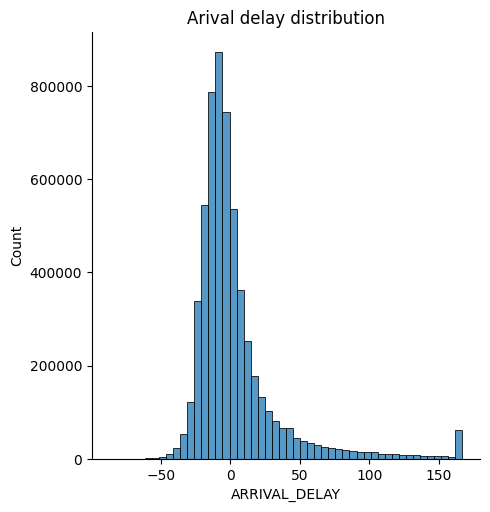

In [349]:
plt.figure(figsize=(6, 4))

sns.displot(df_flights['ARRIVAL_DELAY'], bins=50)

plt.title("Arival delay distribution")
plt.show()

Text(0, 0.5, 'Delay (minutes)')

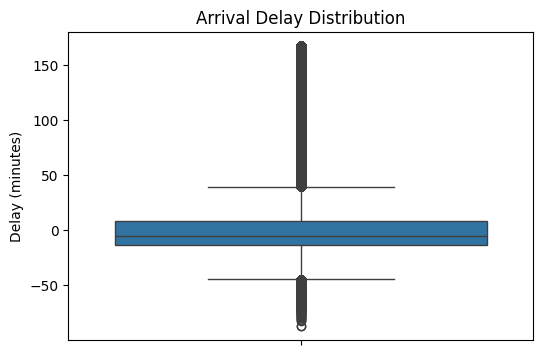

In [350]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_flights['ARRIVAL_DELAY'])
plt.title('Arrival Delay Distribution')
plt.ylabel('Delay (minutes)')

Text(0, 0.5, 'Delay (minutes)')

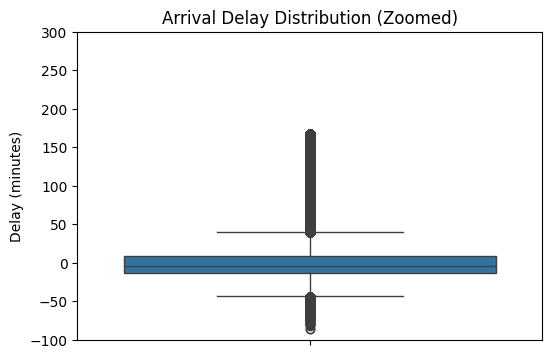

In [351]:
# New boxplot with limited y-axis
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_flights['ARRIVAL_DELAY'])
plt.ylim(-100, 300)
plt.title('Arrival Delay Distribution (Zoomed)')
plt.ylabel('Delay (minutes)')

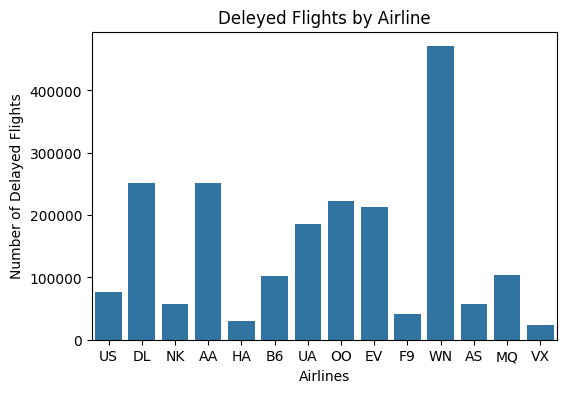

In [352]:
plt.figure(figsize=(6, 4))
delayed_by_airline = df_flights['AIRLINE'][df_flights['ARRIVAL_DELAY'] > 0]

sns.countplot(x = delayed_by_airline)
plt.title("Deleyed Flights by Airline")
plt.xlabel("Airlines")
plt.ylabel("Number of Delayed Flights")
plt.show()

In [353]:
# Average delay by airline
airline_avg_delay = df_flights.groupby('AIRLINE')['ARRIVAL_DELAY'].mean().sort_values(ascending=False)
airline_avg_delay.round(2)

AIRLINE
NK    13.27
F9    10.37
B6     5.80
EV     5.56
MQ     5.28
OO     4.92
UA     4.24
VX     4.18
WN     3.93
US     3.25
AA     2.24
HA     1.62
DL    -0.81
AS    -1.33
Name: ARRIVAL_DELAY, dtype: float64

In [354]:
# Most percent of delayed flights
airline_delayed_pct = df_flights.groupby('AIRLINE').apply(
    lambda x: (x['ARRIVAL_DELAY'] > 0).sum() / len(x) * 100
).sort_values(ascending=False)
airline_delayed_pct.round(2)

AIRLINE
NK    49.38
F9    45.77
HA    39.69
VX    39.48
US    39.28
B6    38.92
OO    38.56
EV    38.43
WN    37.89
MQ    37.13
UA    36.68
AA    35.37
AS    33.22
DL    28.82
dtype: float64

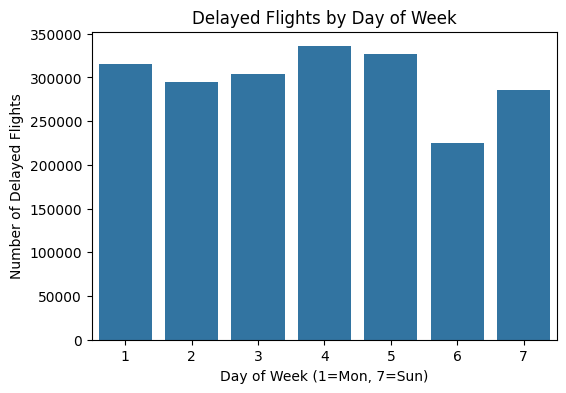

In [355]:
plt.figure(figsize=(6, 4))
delayed_by_day = df_flights[df_flights['ARRIVAL_DELAY'] > 0]['DAY_OF_WEEK']

# Use countplot instead of histplot for categorical data
sns.countplot(x=delayed_by_day, order=[1, 2, 3, 4, 5, 6, 7])
plt.title("Delayed Flights by Day of Week")
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Number of Delayed Flights")
plt.show()

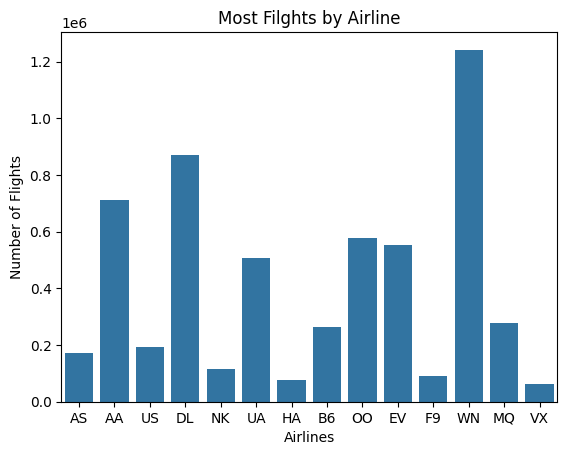

In [356]:
sns.countplot(x = df_flights['AIRLINE'])
plt.title("Most Filghts by Airline")
plt.xlabel("Airlines")
plt.ylabel("Number of Flights")
plt.show()

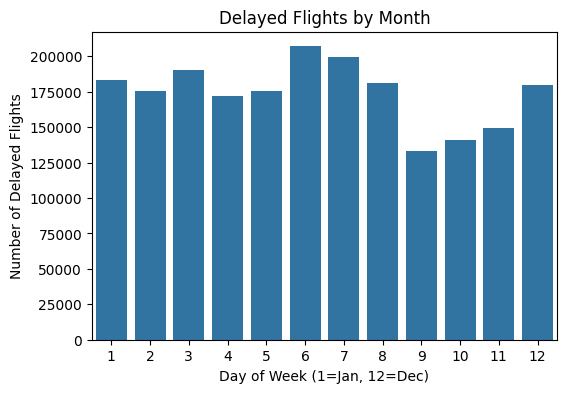

In [357]:
plt.figure(figsize=(6, 4))
delayed_by_day = df_flights[df_flights['ARRIVAL_DELAY'] > 0]['MONTH']

# Use countplot instead of histplot for categorical data
sns.countplot(x=delayed_by_day, order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title("Delayed Flights by Month")
plt.xlabel("Day of Week (1=Jan, 12=Dec)")
plt.ylabel("Number of Delayed Flights")
plt.show()

In [358]:
df_flights['ORIGIN_AIRPORT'].unique()

<StringArray>
[  'ANC',   'LAX',   'SFO',   'SEA',   'LAS',   'DEN',   'SLC',   'PDX',
   'FAI',   'MSP',
 ...
 '13964', '13541', '15027', '10170', '10165', '15497', '12265', '14222',
 '14025', '13502']
Length: 628, dtype: str

## Create Airport Features

**Challenge:** 628 unique airports - too many for one-hot encoding.

**Solution:**
1. Target encoding: Average delay per airport (from train only)
2. One-hot: Top 10 busiest airports
3. Airport type: Major vs Regional
4. Traffic volume: Flight count per airport

**Data leakage prevention:** All stats calculated from training data only!

In [359]:
def classify_airport(code):
    if code.isalpha() and len(code) == 3:
        return 'MAJOR'      # IATA code = major airport
    else:
        return 'REGIONAL'   # Numeric ID = smaller airport
    
df_flights['ORIGIN_AIRPORT_TYPE'] = df_flights['ORIGIN_AIRPORT'].apply(classify_airport)
df_flights['DESTINATION_AIRPORT_TYPE'] = df_flights['DESTINATION_AIRPORT'].apply(classify_airport)

airport_type_traffic_volume = df_flights['ORIGIN_AIRPORT_TYPE'].value_counts()
airport_type_avg_delay = df_flights.groupby('ORIGIN_AIRPORT_TYPE')['ARRIVAL_DELAY'].mean()

print(f"Traffic volume in major and regional airports {airport_type_traffic_volume}\n")
print(f"Average flight delay in major and regional airports: {airport_type_avg_delay}")

Traffic volume in major and regional airports ORIGIN_AIRPORT_TYPE
MAJOR       5231130
REGIONAL     482878
Name: count, dtype: int64

Average flight delay in major and regional airports: ORIGIN_AIRPORT_TYPE
MAJOR       3.969752
REGIONAL   -1.397125
Name: ARRIVAL_DELAY, dtype: float64


In [368]:
df_flights.to_csv('../data/interim/flights_cleaned.csv', index=False)

## Prepare for Modeling

Splitting 80/20 before feature engineering to avoid data leakage.

**Important:** All feature statistics (averages, counts) will be calculated from train set only.

In [360]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_flights, test_size=0.2, random_state=42)

In [361]:
def engineer_airport_features(train_data, test_data):
    train = train_data.copy()
    test = test_data.copy()

    # 1. TARGET ENCODING (Average Delay per Airport)

    # Calculate mean ONLY from train set (avoid leakage!)
    airport_avg_delay_train  = train.groupby('ORIGIN_AIRPORT')['ARRIVAL_DELAY'].mean().round(2)
    # Map to train (uses its own values)
    train['ORIGIN_AVG_DELAY'] = train['ORIGIN_AIRPORT'].map(airport_avg_delay_train)
    # Map to test (uses TRAIN values, not its own!)
    test['ORIGIN_AVG_DELAY'] = test['ORIGIN_AIRPORT'].map(airport_avg_delay_train)

    # For unseen airports that are not in the train set
    global_mean = train['ARRIVAL_DELAY'].mean().round(2)
    test['ORIGIN_AVG_DELAY'] = test['ORIGIN_AVG_DELAY'].fillna(global_mean)

    # 2. ONE-HOT ENCODING for Top 10 Airports

    top_10_airports = train['ORIGIN_AIRPORT'].value_counts().head(10).index
    for airport in top_10_airports:
        train[f'A_{airport}'] = (train['ORIGIN_AIRPORT'] == airport).astype(int)
        test[f'A_{airport}'] = (test['ORIGIN_AIRPORT'] == airport).astype(int)

    # 3. AIRPORT TYPE (Binary: Major vs Regional) 
    train['IS_MAJOR'] = (train['ORIGIN_AIRPORT_TYPE'] == 'MAJOR').astype(int)
    test['IS_MAJOR'] = (test['ORIGIN_AIRPORT_TYPE'] == 'MAJOR').astype(int)

    # 4. TRAFFIC VOLUME (How busy is the airport?)
    airport_traffic = train['ORIGIN_AIRPORT'].value_counts()

    train['ORIGIN_TRAFFIC'] = train['ORIGIN_AIRPORT'].map(airport_traffic)
    test['ORIGIN_TRAFFIC'] = test['ORIGIN_AIRPORT'].map(airport_traffic)

    # For unseen airports that are not in the train set
    median_traffic = train['ORIGIN_TRAFFIC'].median()
    test['ORIGIN_TRAFFIC'] = test['ORIGIN_TRAFFIC'].fillna(median_traffic)

    return train, test

In [362]:
train_engineered, test_engineered = engineer_airport_features(train_data, test_data)

print(f"\nMissing values in train: {train_engineered.isnull().sum().sum()}")
print(f"Missing values in test: {test_engineered.isnull().sum().sum()}")

train_engineered.head()


Missing values in train: 0
Missing values in test: 0


,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,...,A_DFW,A_DEN,A_LAX,A_PHX,A_SFO,A_IAH,A_LAS,A_MSP,IS_MAJOR,ORIGIN_TRAFFIC
3489146,8,5,3,OO,LAX,SAN,1710,53.0,109,1803,...,0,0,1,0,0,0,0,0,1,153684
3426496,8,2,7,AA,SAN,ORD,650,251.0,1723,1301,...,0,0,0,0,0,0,0,0,1,55291
5065539,11,13,5,OO,ORD,BHM,711,111.0,584,902,...,0,0,0,0,0,0,0,0,1,221108
1099105,3,13,5,UA,IAH,ORD,1029,158.0,925,1307,...,0,0,0,0,0,1,0,0,1,115243
146457,1,10,6,EV,ATL,SGF,1051,118.0,563,1149,...,0,0,0,0,0,0,0,0,1,275283


## Feature Correlations

Checking:
1. Which features correlate with ARRIVAL_DELAY?
2. Are any features highly correlated with each other (multicollinearity)?

**Findings:**
- Highest correlation with target: 0.13 (SCHEDULED_DEPARTURE)
- Weak individual correlations are normal for complex problems
- DISTANCE and SCHEDULED_TIME are 0.98 correlated (problem!)

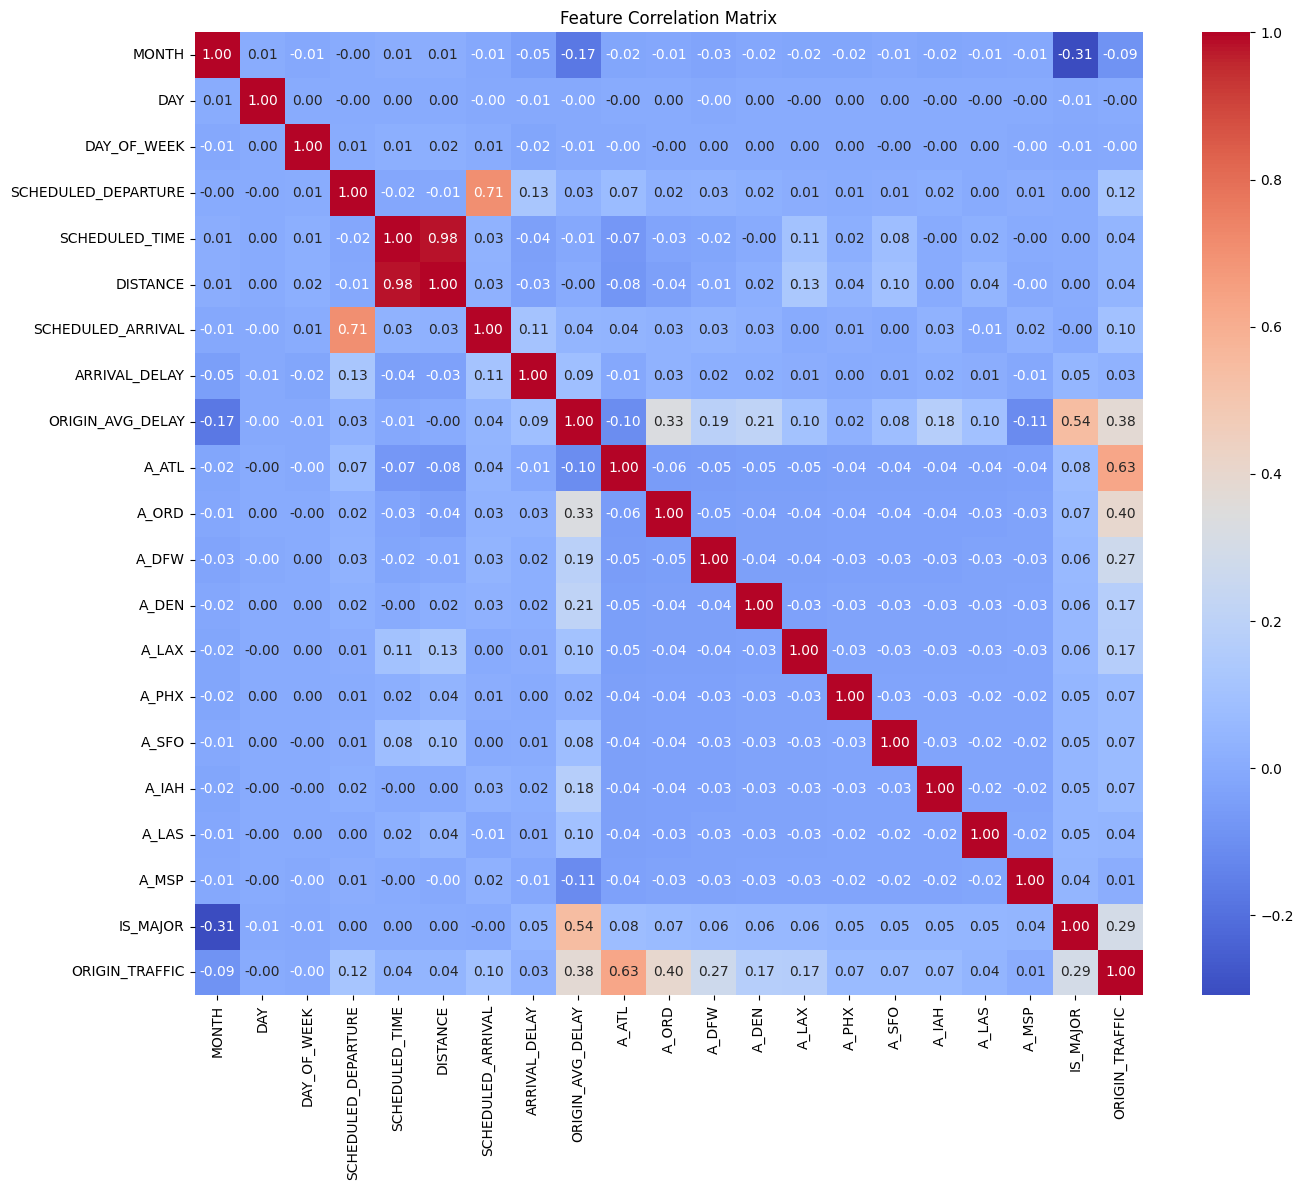

In [363]:
numerical_cols = list(train_engineered.select_dtypes(include='number'))

corr_matrix = train_engineered[numerical_cols].corr()

plt.figure(figsize=(14,12))

sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [364]:
# Focus on TARGET
corr_matrix['ARRIVAL_DELAY'].sort_values(ascending=False).head(10)

ARRIVAL_DELAY          1.000000
SCHEDULED_DEPARTURE    0.125027
SCHEDULED_ARRIVAL      0.109038
ORIGIN_AVG_DELAY       0.086160
IS_MAJOR               0.046944
ORIGIN_TRAFFIC         0.032599
A_ORD                  0.028782
A_DEN                  0.018027
A_DFW                  0.016438
A_IAH                  0.015120
Name: ARRIVAL_DELAY, dtype: float64

In [365]:
train_engineered = train_engineered.drop('DISTANCE', axis=1)
test_engineered = test_engineered.drop('DISTANCE', axis=1)